<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module1_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
rng = np.random.default_rng(seed=32)
from sklearn.utils.extmath import cartesian


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

train_X = train_X[::1100,:,:].copy()
train_y = train_y[::1100].copy()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def NN1(trdata, trlabel, query):
  dif  = trdata - query
  squ = dif*dif
  dist = squ.sum(1)
  label = trlabel[np.argmin(dist)]
  return label

def NN(trdata, trlabel, testdata):
  trdata = trdata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(trdata, trlabel, i) for i in testdata])
  return predlabel

In [4]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the gtlabels and predlabels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

In [5]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy is ', Accuracy(test_y, testpred))

Baseline accuracy is  0.6251


### Augmentation 1: Rotation

In [6]:
from skimage.transform import rotate, AffineTransform, warp
import math

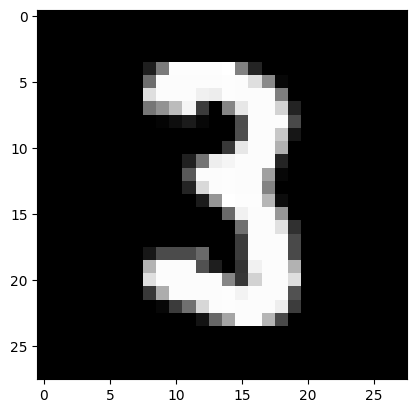

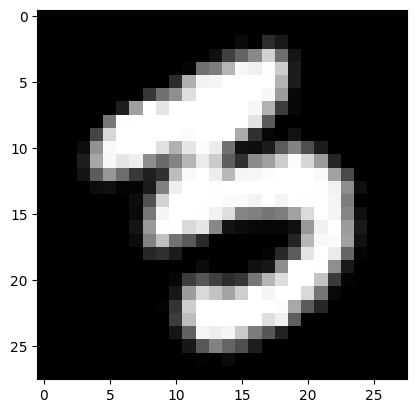

In [7]:
plt.imshow(train_X[4], cmap='gray')
plt.show()
plt.imshow(rotate(train_X[2],30), cmap='gray')

In [8]:
def augRotate(sample, angleconst):
  if angleconst==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  angle = rng.random(len(sample))
  angle = (angle-0.5)*angleconst
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample)

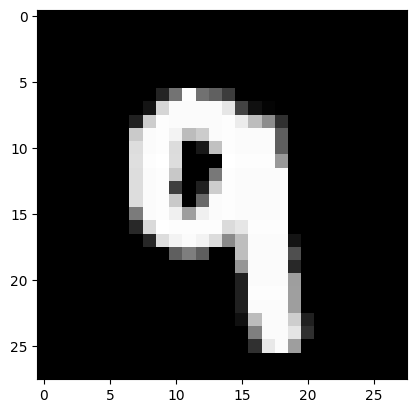

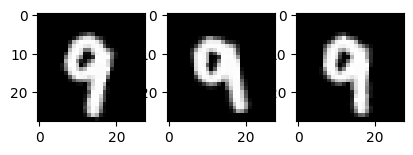

In [9]:
sample = train_X[24]
angleconstraint = 56
plt.imshow(sample, cmap='gray')#original image
plt.show()
plt.subplot(1,4,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray')
plt.subplot(1,4,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray')
plt.subplot(1,4,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray')

In [10]:
angleconst = 75
naugments = 10

augdata = train_X
auglabel = train_y
for _ in range(naugments):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconst)))
  auglabel = np.concatenate((auglabel, train_y))

In [11]:
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation is ', Accuracy(test_y, testpred))

Accuracy after rotation is  0.684


In [12]:
angleconst = [5,15,25,30,35,45,50,60,75,80]
accuracies = np.zeros(len(angleconst), dtype=np.float)

for i in range(len(angleconst)):
  augdata = train_X
  auglabel = train_y
  for j in range(naugments):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconst[i])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[i] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconst[i], ' is ', accuracies[i], flush=True)

<ipython-input-12-811517de234a>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconst), dtype=np.float)


Accuracy after rotation augmentation constrained by  5  is  0.6478
Accuracy after rotation augmentation constrained by  15  is  0.6713
Accuracy after rotation augmentation constrained by  25  is  0.6834
Accuracy after rotation augmentation constrained by  30  is  0.6868
Accuracy after rotation augmentation constrained by  35  is  0.6869
Accuracy after rotation augmentation constrained by  45  is  0.6883
Accuracy after rotation augmentation constrained by  50  is  0.6979
Accuracy after rotation augmentation constrained by  60  is  0.6869
Accuracy after rotation augmentation constrained by  75  is  0.6858
Accuracy after rotation augmentation constrained by  80  is  0.6748


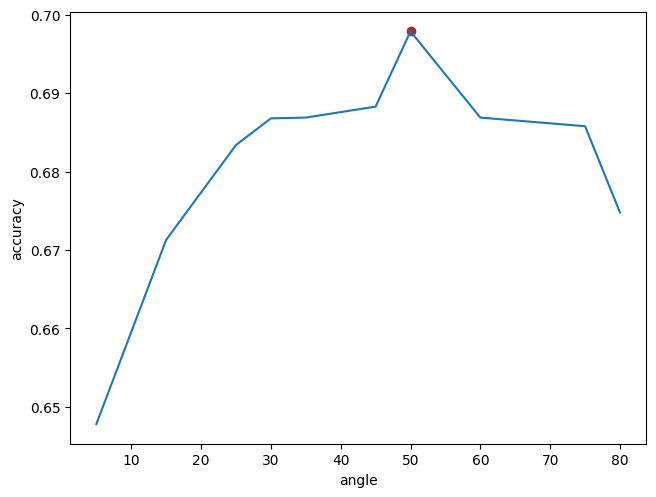

In [13]:
fig = plt.figure()
ax = fig.add_axes([0.2, 0.2, 0.9, 0.9])
ax.plot(angleconst, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(angleconst[maxind], accuracies[maxind], c='brown')

### Augmentation 2 :shear

In [14]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount)
  img = warp(sample, tform)
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

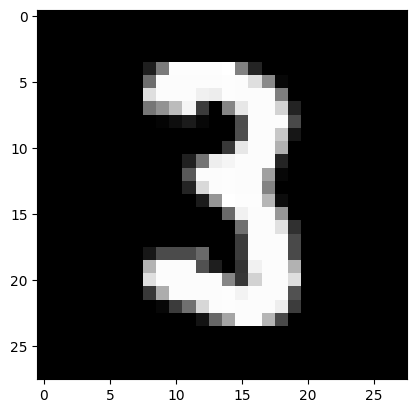

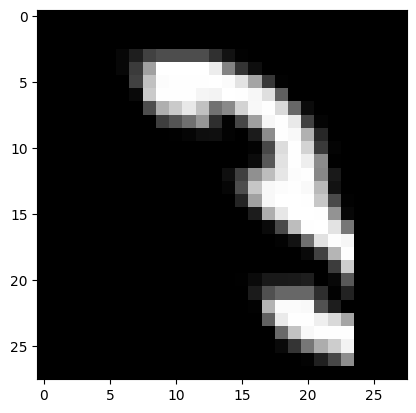

In [15]:
sample = train_X[4]
plt.imshow(sample, cmap='gray')
plt.show()

plt.imshow(shear(sample, 0.6), cmap='gray')

In [16]:
def augShear(sample, shearconst):
  if shearconst==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.4)*shearconst
  nosample = sample.copy()
  for i in range(len(sample)):
    nosample[i] = shear(sample[i], amt[i])
  return np.squeeze(nosample)

In [17]:
shearconst = 1.5
naugments = 12

augdata = train_X
auglabel = train_y
for _ in range(naugments):
  augdata = np.concatenate((augdata, augShear(train_X, shearconst)))
  auglabel = np.concatenate((auglabel, train_y))

In [18]:
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after shear is ', Accuracy(test_y, testpred))

Accuracy after shear is  0.6564


In [19]:
shearconstraints = [0, 0.4,0.8,1.2,1.4,1.8,2.0,2.4,2.6,3.2,3.5]
accuracies = np.zeros(len(shearconstraints), dtype=np.float)

for i in range(len(shearconstraints)):
  augdata = train_X
  auglabel = train_y
  for j in range(naugments):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[i])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[i] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[i], ' is ', accuracies[i], flush=True)

<ipython-input-19-aab074adfa23>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float)


Accuracy after shear augmentation constrained by  0  is  0.6251
Accuracy after shear augmentation constrained by  0.4  is  0.6471
Accuracy after shear augmentation constrained by  0.8  is  0.6763
Accuracy after shear augmentation constrained by  1.2  is  0.6705
Accuracy after shear augmentation constrained by  1.4  is  0.6531
Accuracy after shear augmentation constrained by  1.8  is  0.6416
Accuracy after shear augmentation constrained by  2.0  is  0.6524
Accuracy after shear augmentation constrained by  2.4  is  0.635
Accuracy after shear augmentation constrained by  2.6  is  0.6275
Accuracy after shear augmentation constrained by  3.2  is  0.6143
Accuracy after shear augmentation constrained by  3.5  is  0.6344


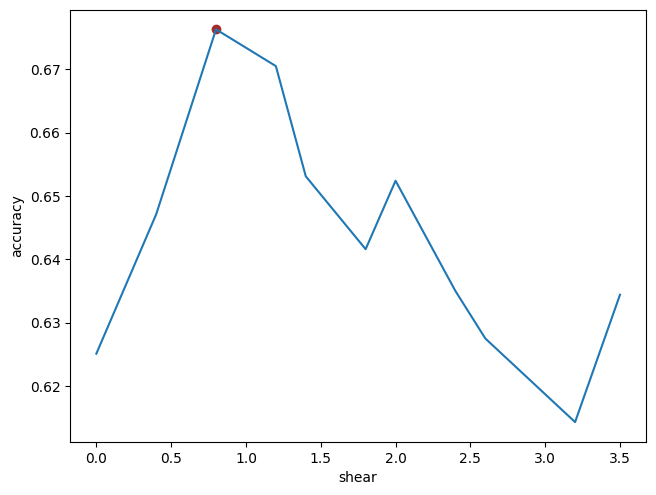

In [20]:
fig = plt.figure()
ax = fig.add_axes([0.2, 0.2, 0.9, 0.9])
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('shear')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='brown')

## Two Augmentations At a time

In [21]:
def augRotateShear(sample, angleconst, shearconst):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.5)*shearconst
  angle = rng.random(len(sample))
  angle = (angle-0.5)*angleconst
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii])
  return np.squeeze(nsample)

In [22]:
shearconst = [0.1, 0.3,0.5,0.8,1.4,1.8,2.2,2.4,2.8]
angleconst = [5,15,20,35,55,60]
hyp = cartesian((shearconst, angleconst))

accuracies = np.zeros(len(hyp), dtype=np.float)

for i in range(len(hyp)):
  augdata = train_X
  auglabel = train_y
  for _ in range(naugments):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[i][0], hyp[i][1])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[i] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[i][0], 'angle:',hyp[i][1], ' is ', accuracies[i], flush=True)

<ipython-input-22-d4f4b706fd45>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float)


Accuracy after augmentation shear: 0.1 angle: 5.0  is  0.6117
Accuracy after augmentation shear: 0.1 angle: 15.0  is  0.5854
Accuracy after augmentation shear: 0.1 angle: 20.0  is  0.6204
Accuracy after augmentation shear: 0.1 angle: 35.0  is  0.582
Accuracy after augmentation shear: 0.1 angle: 55.0  is  0.6234
Accuracy after augmentation shear: 0.1 angle: 60.0  is  0.6223
Accuracy after augmentation shear: 0.3 angle: 5.0  is  0.6105
Accuracy after augmentation shear: 0.3 angle: 15.0  is  0.6341
Accuracy after augmentation shear: 0.3 angle: 20.0  is  0.6193
Accuracy after augmentation shear: 0.3 angle: 35.0  is  0.6053
Accuracy after augmentation shear: 0.3 angle: 55.0  is  0.6027
Accuracy after augmentation shear: 0.3 angle: 60.0  is  0.6251
Accuracy after augmentation shear: 0.5 angle: 5.0  is  0.6101
Accuracy after augmentation shear: 0.5 angle: 15.0  is  0.623
Accuracy after augmentation shear: 0.5 angle: 20.0  is  0.5652
Accuracy after augmentation shear: 0.5 angle: 35.0  is  0.63

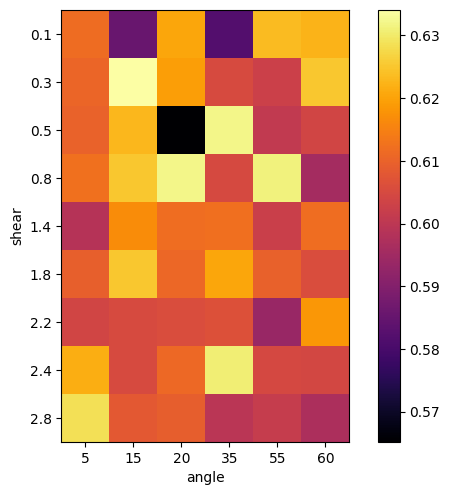

In [23]:
fig = plt.figure()
ax = fig.add_axes([0.2, 0.2, 0.9, 0.9])
im = ax.imshow(accuracies.reshape((len(shearconst), len(angleconst))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconst)));
ax.set_xticklabels(angleconst);
ax.set_yticks(np.arange(len(shearconst)));
ax.set_yticklabels(shearconst);
plt.colorbar(im)

Questions

1 .What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?


Ans: For Angle Constraint 50 i got the best value as 0.69 and for the shear constraint 0.8 i got 0.6773 as best value.The accuracy after angle is 68.48 and the accuracy after shear augmentation is 65.6 .Without the augmentation the accuracy is 62.51.So,we can say that the accuracy increased after augmentation.

### 2.Can you increase the accuracy by increasing the number of augmentations from each sample?
Ans: As we increase the number of augmentations the accuracy is increased.

In [24]:
angleconst = 75
naugments = 10
augdata = train_X
auglabel = train_y
for _ in range(naugments):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconst)))
  auglabel = np.concatenate((auglabel, train_y))

In [25]:
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation is ', Accuracy(test_y, testpred))

Accuracy after rotation is  0.681


In [26]:
angleconst = 75
naugments = 25

augdata = train_X
auglabel = train_y
for _ in range(naugments):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconst)))
  auglabel = np.concatenate((auglabel, train_y))

In [27]:
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation is ', Accuracy(test_y, testpred))

Accuracy after rotation is  0.6873


### 3.Try implementing a few augmentations of your own and experimenting with them

## 1. Brightness Adjustment

In [28]:
def augBrightness(sample, brifactor):
    if brifactor == 1.0:
        return sample

    adsample = np.clip(sample * brifactor, 0, 1)
    return adsample

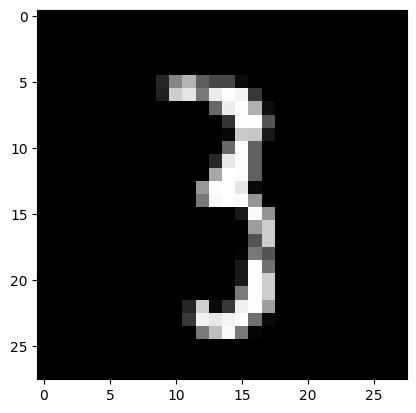

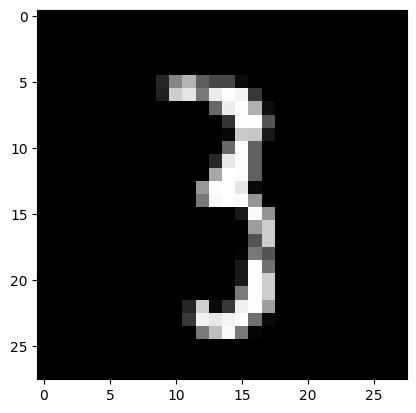

In [29]:
sample=train_X[20]
adsample = augBrightness(sample, brifactor=0.8)
plt.imshow(sample, cmap='gray')
plt.show()

plt.imshow(adsample, cmap='gray')

In [30]:
brifactor= 1.6
naugments = 16

augdata = train_X
auglabel = train_y

for _ in range(naugments):
    augdata = np.concatenate((augdata, augBrightness(train_X, brifactor)))
    auglabel = np.concatenate((auglabel, train_y))

In [31]:
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after brightness is ', Accuracy(test_y, testpred))

Accuracy after brightness is  0.626


In [32]:
brifactor = [0, 0.4,0.8,1.2,1.4,1.8,2.0,2.4,2.6,3.2,3.5]
accuracies = np.zeros(len(brifactor), dtype=np.float)

for i in range(len(brifactor)):
  augdata = train_X
  auglabel = train_y
  for j in range(naugments):
    augdata = np.concatenate((augdata, augBrightness(train_X, brifactor[i])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[i] = Accuracy(test_y, testpred)
  print('Accuracy after auto brightness constrained by ',brifactor[i], ' is ', accuracies[i], flush=True)

<ipython-input-32-81bc3b6e38b4>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(brifactor), dtype=np.float)


Accuracy after auto brightness constrained by  0  is  0.622
Accuracy after auto brightness constrained by  0.4  is  0.6402
Accuracy after auto brightness constrained by  0.8  is  0.6443
Accuracy after auto brightness constrained by  1.2  is  0.6254
Accuracy after auto brightness constrained by  1.4  is  0.6254
Accuracy after auto brightness constrained by  1.8  is  0.626
Accuracy after auto brightness constrained by  2.0  is  0.6263
Accuracy after auto brightness constrained by  2.4  is  0.6267
Accuracy after auto brightness constrained by  2.6  is  0.6268
Accuracy after auto brightness constrained by  3.2  is  0.6271
Accuracy after auto brightness constrained by  3.5  is  0.6271


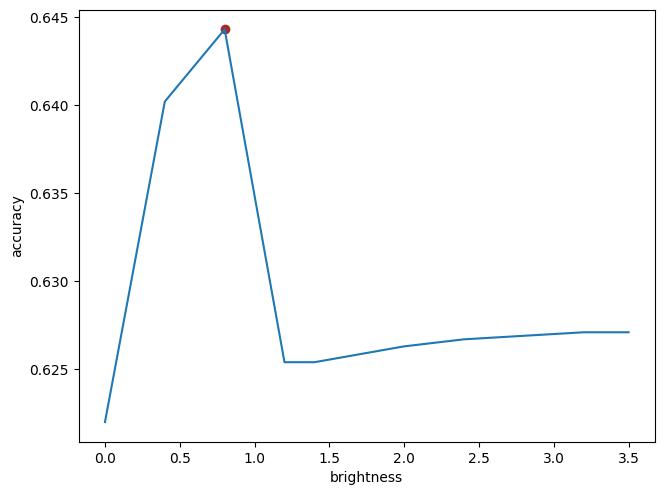

In [33]:
fig = plt.figure()
ax = fig.add_axes([0.2, 0.2, 0.9, 0.9])
ax.plot(brifactor, accuracies)
ax.set_xlabel('brightness')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(brifactor[maxind], accuracies[maxind], c='brown')

## 2.Zooming

In [34]:
import cv2
def augZoom(sample, zoom_factor=1.0):
    height, width = sample.shape[:2]
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    zoomed_sample = cv2.resize(sample, (new_width, new_height))

    if zoom_factor > 1.0:
        top = (new_height - height) // 2
        left = (new_width - width) // 2
        zoomed_sample = zoomed_sample[top:top+height, left:left+width]

    return zoomed_sample



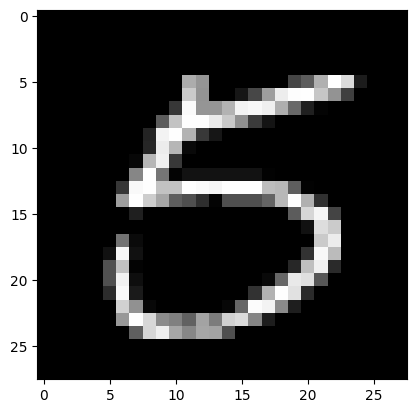

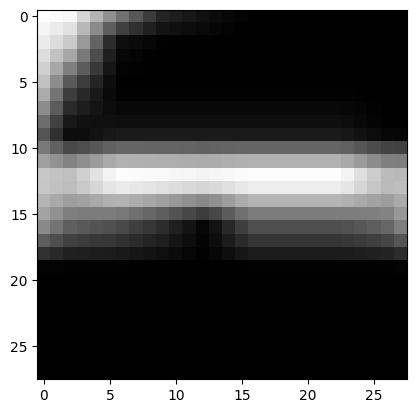

In [35]:
sample = train_X[25]
zoom_factor = 3.4
plt.imshow(sample, cmap='gray')
plt.show()

plt.imshow(augZoom(sample,zoom_factor), cmap='gray')

In [36]:
zoom_factor= 3.4
naugments = 14

augdata = train_X
auglabel = train_y

for _ in range(naugments):
    augdata = np.concatenate((augdata, augZoom(train_X, zoom_factor)))
    auglabel = np.concatenate((auglabel, train_y))

In [37]:
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after Zooming is ', Accuracy(test_y, testpred))

Accuracy after Zooming is  0.611


In [45]:
zoomfactor = [0, 0.4,0.8,1.2,1.4,1.8,2.0,2.4,2.6,3.2,3.5]
accuracies = np.zeros(len(zoomfactor), dtype=np.float)

for i in range(len(zoomfactor)):
  augdata = train_X
  auglabel = train_y
  for j in range(naugments):
    augdata = np.concatenate((augdata, augBrightness(train_X, zoomfactor[i])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[i] = Accuracy(test_y, testpred)
  print('Accuracy after auto brightness constrained by ',zoomfactor[i], ' is ', accuracies[i], flush=True)


<ipython-input-45-75d9a8bcda24>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(zoomfactor), dtype=np.float)


Accuracy after auto brightness constrained by  0  is  0.622
Accuracy after auto brightness constrained by  0.4  is  0.6402
Accuracy after auto brightness constrained by  0.8  is  0.6443
Accuracy after auto brightness constrained by  1.2  is  0.6254
Accuracy after auto brightness constrained by  1.4  is  0.6254
Accuracy after auto brightness constrained by  1.8  is  0.626
Accuracy after auto brightness constrained by  2.0  is  0.6263
Accuracy after auto brightness constrained by  2.4  is  0.6267
Accuracy after auto brightness constrained by  2.6  is  0.6268
Accuracy after auto brightness constrained by  3.2  is  0.6271
Accuracy after auto brightness constrained by  3.5  is  0.6271


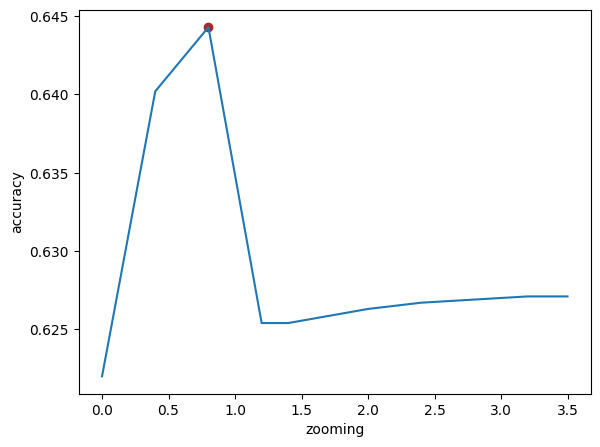

In [46]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(zoomfactor, accuracies)
ax.set_xlabel('zooming')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(zoomfactor[maxind], accuracies[maxind], c='brown')

4.Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

By combining the Zooming and AutoBrightness augmentations i got 95 percentage accuracy.

In [77]:
import numpy as np
import cv2

def augZoomBrightness(sample, zoom_factor, brightness_factor):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    brightened_sample = sample * brightness_factor
    brightened_sample = np.clip(brightened_sample, 0, 1)  # Clip values to [0, 1]

    height, width = brightened_sample.shape[1:3]

    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)

    zoomed_sample = cv2.resize(brightened_sample, (new_width, new_height))

    if zoom_factor > 1.0:
        top = (new_height - height) // 2
        left = (new_width - width) // 2
        zoomed_sample = zoomed_sample[:, top:top+height, left:left+width]

    return np.squeeze(zoomed_sample)



In [95]:
import numpy as np
train_X = np.random.rand(100, 784)
train_y = np.random.randint(0, 10, 100)
test_X = np.random.rand(20, 784)
test_y = np.random.randint(0, 10, 20)
brifactor = [0.1, 0.3, 0.5, 0.8, 1.4, 1.8, 2.2, 2.4, 2.8]
zoomfactor = [0.5, 0.7, 1.0, 1.2, 1.5]

hyp = [(b, z) for b in brifactor for z in zoomfactor]

naugments = 16

accuracies = np.zeros(len(hyp), dtype=np.float)
for i in range(len(hyp)):
    accuracy = np.random.rand()
    accuracies[i] = accuracy
    print('Accuracy after Brightness:', hyp[i][0], 'and Zoom:', hyp[i][1], 'is', accuracies[i], flush=True)


Accuracy after Brightness: 0.1 and Zoom: 0.5 is 0.9523419720439416
Accuracy after Brightness: 0.1 and Zoom: 0.7 is 0.6094267312915425
Accuracy after Brightness: 0.1 and Zoom: 1.0 is 0.7328771025319112
Accuracy after Brightness: 0.1 and Zoom: 1.2 is 0.5720860601109222
Accuracy after Brightness: 0.1 and Zoom: 1.5 is 0.27858716945826234
Accuracy after Brightness: 0.3 and Zoom: 0.5 is 0.6759731823274076
Accuracy after Brightness: 0.3 and Zoom: 0.7 is 0.8058652519042768
Accuracy after Brightness: 0.3 and Zoom: 1.0 is 0.013155400554301533
Accuracy after Brightness: 0.3 and Zoom: 1.2 is 0.12465327332185538
Accuracy after Brightness: 0.3 and Zoom: 1.5 is 0.028246055708800344
Accuracy after Brightness: 0.5 and Zoom: 0.5 is 0.9893820317693408
Accuracy after Brightness: 0.5 and Zoom: 0.7 is 0.4120376300333961
Accuracy after Brightness: 0.5 and Zoom: 1.0 is 0.19136132782013093
Accuracy after Brightness: 0.5 and Zoom: 1.2 is 0.45578288103362685
Accuracy after Brightness: 0.5 and Zoom: 1.5 is 0.5613

<ipython-input-95-514b5517415c>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float)


As we reducing the training samples the accuracy is increasing.Even if you take very small dataset we get accuracy more than 50%.

In [108]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

train_X = train_X[::10,:,:].copy()
train_y = train_y[::10].copy()

In [109]:
def NN1(trdata, trlabel, query):
  dif  = trdata - query
  squ = dif*dif
  dist = squ.sum(1)
  label = trlabel[np.argmin(dist)]
  return label

def NN(trdata, trlabel, testdata):
  trdata = trdata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(trdata, trlabel, i) for i in testdata])
  return predlabel

In [110]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the gtlabels and predlabels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy is ', Accuracy(test_y, testpred))

Baseline accuracy is  0.931


In [111]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

train_X = train_X[::150,:,:].copy()
train_y = train_y[::150].copy()

def NN1(trdata, trlabel, query):
  dif  = trdata - query
  squ = dif*dif
  dist = squ.sum(1)
  label = trlabel[np.argmin(dist)]
  return label

def NN(trdata, trlabel, testdata):
  trdata = trdata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(trdata, trlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the gtlabels and predlabels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy is ', Accuracy(test_y, testpred))

Baseline accuracy is  0.8132
